In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [50]:
import seaborn as sns
%matplotlib inline

In [51]:
import datetime as dt

In [52]:
dataset = pd.read_csv(r'C:\Users\ANUBHAV CHAUHAN\Desktop\BI Capstone Projects\Fraud det\Fraud Detection.csv')

In [53]:
dataset.shape

(76529, 11)

In [54]:
dataset.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [56]:

dataset['is_fraud'] = dataset['is_fraud'].astype('object')

In [57]:
# converting partner_pricing_category from int to category because it has only 4 types of different values
dataset['partner_pricing_category'] = dataset['partner_pricing_category'].astype('object')

In [58]:
# converting transaction_initiation from object to datetime 
dataset['transaction_initiation'] = pd.to_datetime(dataset['transaction_initiation'])

In [59]:
dataset.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [60]:
#  extracting day, month, year from transaction-initiation

dataset['year'] = dataset['transaction_initiation'].dt.year
dataset['month'] = dataset['transaction_initiation'].dt.month
dataset['day'] = dataset['transaction_initiation'].dt.day

In [61]:
dataset = dataset[['transaction_number','user_id','payment_method','partner_id','partner_category','country','device_type','money_transacted','transaction_initiation','year','month','day','partner_pricing_category','is_fraud']]

In [62]:
dataset['year'] = dataset['year'].astype('object')
dataset['month'] = dataset['month'].astype('object')
# dataset['day'] = pd.to_datetime(dataset['day'])

# dataset.info()

In [63]:
dataset['money_transacted'] = dataset['money_transacted'].astype('str')

In [64]:
cred_deb = []
for i in dataset['money_transacted']:
  if (i.find('-') == 0):
    cred_deb.append('credit')
  else:
    cred_deb.append('debit')

In [65]:
dataset['money_transacted'] = dataset['money_transacted'].astype('float64')

In [66]:
dataset['cred_deb'] = cred_deb
dataset = dataset[['transaction_number','user_id','payment_method','partner_id','partner_category','country','device_type','money_transacted','cred_deb','transaction_initiation','year','month','day','partner_pricing_category','is_fraud']]
dataset

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,cred_deb,transaction_initiation,year,month,day,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,credit,2016-11-15 19:16:12+00:00,2016,11,15,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,debit,2017-01-11 09:25:33+00:00,2017,1,11,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,debit,2016-12-07 07:58:09+00:00,2016,12,7,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,debit,2017-01-11 16:15:44+00:00,2017,1,11,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,debit,2016-11-16 17:04:42+00:00,2016,11,16,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,credit,2016-11-30 13:40:45+00:00,2016,11,30,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,debit,2017-01-08 08:35:31+00:00,2017,1,8,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,credit,2016-12-26 21:47:08+00:00,2016,12,26,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,credit,2016-12-11 13:44:06+00:00,2016,12,11,2,0


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   transaction_number        76529 non-null  int64              
 1   user_id                   76529 non-null  int64              
 2   payment_method            76529 non-null  object             
 3   partner_id                76529 non-null  int64              
 4   partner_category          76529 non-null  object             
 5   country                   76529 non-null  object             
 6   device_type               76529 non-null  object             
 7   money_transacted          76529 non-null  float64            
 8   cred_deb                  76529 non-null  object             
 9   transaction_initiation    76529 non-null  datetime64[ns, UTC]
 10  year                      76529 non-null  object             
 11  month          

In [68]:
fraud_det = dataset

In [69]:
fraud_det.drop(['day'], axis = 1, inplace = True) 

In [70]:
fraud_det.drop(['year'], axis = 1, inplace = True) 

In [71]:
fraud_det.drop(['month'], axis = 1, inplace = True) 

In [72]:
fraud_det.drop(['transaction_number'], axis = 1, inplace = True) 

In [73]:
fraud_det.drop(['user_id'], axis = 1, inplace = True) 

In [74]:
fraud_det.drop(['partner_id'], axis = 1, inplace = True) 

In [75]:
fraud_det.drop(['transaction_initiation'], axis = 1, inplace= True)

In [76]:
# Here I am creating dummy variable for categorical data.
fraud_det = pd.get_dummies(fraud_det,columns = ['payment_method','partner_category','country','device_type','cred_deb','partner_pricing_category'], drop_first = True)

In [77]:
fraud_det

,money_transacted,is_fraud,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs,cred_deb_debit,partner_pricing_category_1,partner_pricing_category_2,partner_pricing_category_4
0,-5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,100.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,50.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,1000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4,200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,-100.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
76525,200.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
76526,-3.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
76527,-20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [78]:
fraud_det.shape

(76529, 22)

In [79]:
#Splitting dataset into dependent and independent variables.
X = fraud_det.loc[:,fraud_det.columns != 'is_fraud']
y = fraud_det.loc[:,fraud_det.columns == 'is_fraud']
y=y.astype('int')
# y =y.to_numpy()
# X = X.to_numpy()

In [80]:
# split imbalanced dataset into train and test sets with stratification

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)


In [81]:
#print lenght of both test and train set
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  57396 
shape of y_train :  57396

shape of X_test  :  19133 
shape of y_test  :  19133


In [82]:
df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)
print('*************After Stratified Sampling***************')
print(df_ytrain.value_counts())
print(df_ytest.value_counts())

*************After Stratified Sampling***************
is_fraud
0           57281
1             115
dtype: int64
is_fraud
0           19094
1              39
dtype: int64


In [83]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [86]:
#Training Accuracy 
classifier.score(X_train, y_train)

0.9997560805631055

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
score = accuracy_score(y_test, y_pred)
score

[[19091     3]
 [    4    35]]


0.9996341399675952

Text(0.5, 1.0, 'Accuracy Score: 0.9996341399675952')

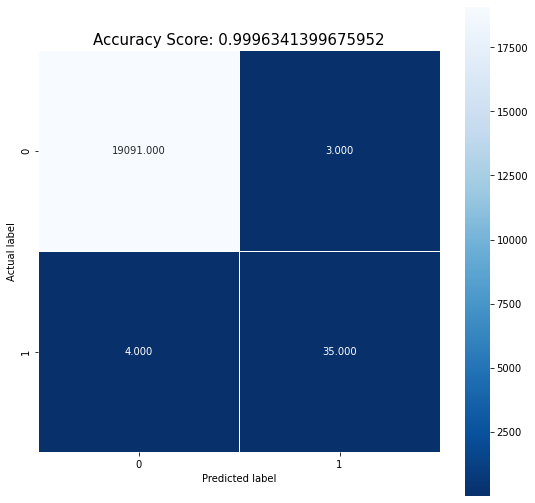

In [89]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.92      0.90      0.91        39

    accuracy                           1.00     19133
   macro avg       0.96      0.95      0.95     19133
weighted avg       1.00      1.00      1.00     19133



In [91]:
import pickle
# open a file, where you ant to store the data
file = open('decision_tree_classifier_model.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)